<h1><center><strong>CX 4803<br><br>Homework 1</strong></center></h1>
<h3><center><i>Dylan Both</i></center></h3>

In [ ]:
# !pip install -U notebook-as-pdf
# !pyppeteer-install
# !pip install pandoc
!pip install nbconvert

In [19]:
# imports
import csv
import numpy as np
import pandas as pd
from scipy import linalg
from scipy.stats import t
import pandoc
import nbconvert
import matplotlib.pyplot as plt
import random as rand
import math

## Problem 1:

In [2]:
# read in data
x_d1, y_d1 = np.loadtxt('hw1_q1_d1.csv', delimiter=',', usecols=(0,1), unpack=True, dtype=float)
x_d2, y_d2 = np.loadtxt('hw1_q1_d2.csv', delimiter=',', usecols=(0,1), unpack=True, dtype=float)
x_d3, y_d3 = np.loadtxt('hw1_q1_d3.csv', delimiter=',', usecols=(0,1), unpack=True, dtype=float)
x_d4, y_d4 = np.loadtxt('hw1_q1_d4.csv', delimiter=',', usecols=(0,1), unpack=True, dtype=float)

### 1(a)
For each dataset, we want to solve the equation
\begin{align}
y&=X\hat{w}\\
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
y_5\\
y_6\\
y_7\\
y_8\\
y_9\\
y_{10}\\
y_{11}
\end{bmatrix}
&= 
\begin{bmatrix}
1&x_1\\
1&x_2\\
1&x_3\\
1&x_4\\
1&x_5\\
1&x_6\\
1&x_7\\
1&x_8\\
1&x_9\\
1&x_{10}\\
1&x_{11}\\
\end{bmatrix}
\cdot
\begin{bmatrix}
w_0 \\w_1
\end{bmatrix}
\end{align}
for $\hat{w}$ to find the least squares solution.<br><br>

We need to add $1$'s to our x-vectors before we solve so that the $w_0$ term is included in our regression.

In [3]:
# add column of 1's to include an intercept
ones = np.ones(11)
x_d1 = np.c_[ones, x_d1]
x_d2 = np.c_[ones, x_d2]
x_d3 = np.c_[ones, x_d3]
x_d4 = np.c_[ones, x_d4]

Now we are ready to solve $y=wX$ for $w$ for each data set.

In [4]:
# solve equations
w_d1 = linalg.lstsq(x_d1, y_d1)[0]
w_d2 = linalg.lstsq(x_d2, y_d2)[0]
w_d3 = linalg.lstsq(x_d3, y_d3)[0]
w_d4 = linalg.lstsq(x_d4, y_d4)[0]

The RSS is the squared 2-norm of the difference between $y$ and $\hat{w}X$. That is, 
\begin{align}
RSS(\hat{w})&=\sum_{i=1}^{11}\big(y-(w_0+w_1\cdot x_i)\big)^2\\
&=\sum_{i=1}^{11}\big(y-\hat{y}\big)^2\\
&=\sum_{i=1}^{11}r_{i}^2
\end{align}

In [5]:
# get the y-hats
y_d1_hat = (w_d1.dot(x_d1.T))
y_d2_hat = (w_d2.dot(x_d2.T))
y_d3_hat = (w_d3.dot(x_d3.T))
y_d4_hat = (w_d4.dot(x_d4.T))

# get the residuals
r_d1 = y_d1 - y_d1_hat
r_d2 = y_d2 - y_d2_hat
r_d3 = y_d3 - y_d3_hat
r_d4 = y_d4 - y_d4_hat

# get the RSS
rss_d1 = np.sum(np.square(r_d1))
rss_d2 = np.sum(np.square(r_d2))
rss_d3 = np.sum(np.square(r_d3))
rss_d4 = np.sum(np.square(r_d4))

In [6]:
# create summary table
cols = ['sample', 'w_0', 'w_1', 'RSS']
sum_table = pd.DataFrame(columns=cols)
sum_table.loc[0] = np.array(['d1', round(w_d1[0], 4), round(w_d1[1], 4), round(rss_d1, 4)])
sum_table.loc[1] = np.array(['d2', round(w_d2[0], 4), round(w_d2[1], 4), round(rss_d2, 4)])
sum_table.loc[2] = np.array(['d3', round(w_d3[0], 4), round(w_d3[1], 4), round(rss_d3, 4)])
sum_table.loc[3] = np.array(['d4', round(w_d4[0], 4), round(w_d4[1], 4), round(rss_d4, 4)])

### Solution to 1 (a):


|Sample|$\hat{w_0}$|$\hat{w_0}$|$RSS(\hat{w})$|
|------|------|------|-----|
|d1|3.0001|0.5001|13.7627|
|d1|3.0009|0.5|13.7763|
|d1|3.0025|0.4997|13.7562|
|d1|3.0017|0.4999|13.7425|

### 1(b):
We use the variance of the residuals as an estimate of the variance of the noise. This is <br><br>
<center>$\hat{\sigma}^2=\frac{1}{n-2}RSS(\hat{w})$

In [7]:
# estimate sigma squared
est_n_var_d1 = (1/9)*rss_d1
est_n_var_d2 = (1/9)*rss_d2
est_n_var_d3 = (1/9)*rss_d3
est_n_var_d4 = (1/9)*rss_d4

The estimated variance of the noise for each sample are:
<ul>
    <li>d1: $\hat{\sigma}^2=3.0567$</li>
    <li>d2: $\hat{\sigma}^2=3.0556$</li>
    <li>d3: $\hat{\sigma}^2=3.0522$</li>
    <li>d4: $\hat{\sigma}^2=3.0544$</li>
</ul>

### 1(c):

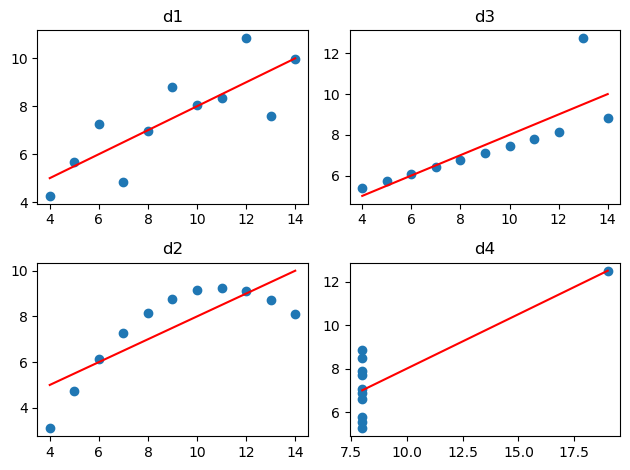

In [8]:
# plot each fitted line with the actual data
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0, 0].scatter(x_d1[:, 1], y_d1, label='data')
ax[0, 0].plot(x_d1[:, 1], y_d1_hat, 'r', label='Fitted line')
ax[0, 0].set_title('d1')

ax[1, 0].scatter(x_d2[:, 1], y_d2, label='data')
ax[1, 0].plot(x_d2[:, 1], y_d2_hat, 'r', label='Fitted line')
ax[1, 0].set_title('d2')

ax[0, 1].scatter(x_d3[:, 1], y_d3, label='data')
ax[0, 1].plot(x_d3[:, 1], y_d3_hat, 'r', label='Fitted line')
ax[0, 1].set_title('d3')

ax[1, 1].scatter(x_d4[:, 1], y_d4, label='data')
ax[1, 1].plot(x_d4[:, 1], y_d4_hat, 'r', label='Fitted line')
ax[1, 1].set_title('d4')

plt.tight_layout()
plt.show()


### 1 (d):
<ul>
    <li>For the first data set, the best fit line captures the trends in the data fairly well since the actual data points are distributed fairly evenly above and below the best fit line.</li>
    <li>The best fit line does an okay but not great job capturing the trends in the data in the second data set. Although the line lies very close to all but one data point, the slope of the line is too steep and consistanlty overpredicts because it is being affected by the outlier.</li>
    <li> The best fit line does not do a good job capturing the trends in the data from the third data set because the actual relationship is quadratic rather than linear.</li>
    <li>The best fit line does not capture the trends in the fourth data set because it does not account for the possibility of multiple y-values for the same x-value. Therefore, the best fit line only essentially says that the one outlier is just as important in the trend in the actual data.</li>
</ul>

### 1(e):
For a higher dimensional data set, I would use the mean squared error to check my regression model. Rather than visually inspecting if the regression captures the relationship between two variables, I would evaluate how far the predictions given by the model vary from the actual data on average. The mean squared error is the average of the terms in RSS; therefore, the mean squared error reveals if the model is typically predicting close to the true values while penalyzing the model for predictions that are far from the actual data. A high dimensional regression model that capture the trends in the actual data will have a relatively low MSE.

## Problem 2:

In [9]:
# read in the data
x_1 = np.loadtxt('hw1_q2.csv', delimiter=',', usecols=(0), unpack=True, dtype=float)
x_2 = np.loadtxt('hw1_q2.csv', delimiter=',', usecols=(1), unpack=True, dtype=float)
x_3 = np.loadtxt('hw1_q2.csv', delimiter=',', usecols=(2), unpack=True, dtype=float)
x_4 = np.loadtxt('hw1_q2.csv', delimiter=',', usecols=(3), unpack=True, dtype=float)
x_5 = np.loadtxt('hw1_q2.csv', delimiter=',', usecols=(4), unpack=True, dtype=float)
y = np.loadtxt('hw1_q2.csv', delimiter=',', usecols=(5), unpack=True, dtype=float)

### 2(a):

In the case of a multiple linear regression with p=5 features, we want to solve the equation
\begin{align}
y=X\hat{w}
\end{align}
for $\hat{w}$ where $y$ is the vector of all 32 observed y values and $X$ is the matrix:
\begin{align}
\begin{bmatrix}
1&x_{1 ,1}&x_{1, 2}&x_{1, 3}&x_{1, 4}&x_{1, 5}\\
1&x_{2, 1}&x_{2, 2}&x_{2, 3}&x_{2, 4}&x_{2. 5}\\
...&...&...&...&...&...\\
1&x_{32, 1}&x_{32, 2}&x_{32, 3}&x_{32, 4}&x_{32, 5}\\
\end{bmatrix}
\end{align}

<i>note: the dots are inteded to be vertical to indicate that each of the 32 observations occupies a row of the matrix.</i>


In [10]:
# create the matrix X
ones = np.ones(32)
X = np.c_[ones, x_1, x_2, x_3, x_4, x_5]

# solve the equation for w_hat
w_hat = linalg.lstsq(X, y)[0]

The values for each $w_i$ are:
<ul>
    <li>$w_0=0.2222$</li>
    <li>$w_1=-3.1044$</li>
    <li>$w_2=-1.4107$</li>
    <li>$w_3=2.7464$</li>
    <li>$w_4=-2.0361$</li>
    <li>$w_5=2.9388$</li>
</ul>

### 2(b):

In [11]:
# make predictions when each x-value is 0.4
x = np.full(shape=5, fill_value=0.4)
x = np.insert(x, 0, 1)
y_pred = sum(x*w_hat)

For $x=[0.4,0.4,0.4,0.4,0.4]$, the predicted $y$ value is $-0.1242$.

### 2(c):
The unbiased estimator of the noise is
\begin{align}
\hat{\sigma}^2&=\frac{1}{n-(p+1)}RSS(\hat{w})
\end{align}

In [12]:
# get y-predictions
y_hat = X.dot(w_hat)
# calculate the residual sum of squares
rss = np.sum(np.square(y - y_hat))
# use RSS to estimate sigma squared
sigma_sq_hat = (1/26)*rss

The unbiased estimate for the noise of the data is 
\begin{align}
\hat{\sigma}^2&=0.0059
\end{align}

### 2(d):
Since our noise has mean $0$, the covariance matrix for $\hat{w}$ can be expressed as 
\begin{align}
\text{cov}(\hat{w})&=\sigma^2(X^TX)^{-1}.
\end{align}
Therefore, our estimate for the covariance matrix is
\begin{align}
\text{cov}(\hat{w})&=\hat{\sigma}^2(X^TX)^{-1}.
\end{align}
The variance of the first coefficient is the second diagonal entry of the covariance matrix.

In [13]:
# find covariance matrix
cov_matrix = linalg.inv(X.T.dot(X))
# get the second diagonal entry
var_w_1 = sigma_sq_hat * cov_matrix[1][1]

The variance of $\hat{w}_1$ is 
\begin{align}
\text{Var}(\hat{w}_1)=0.0019
\end{align}

## Problem 3:

### 3(a):
I arbitrarily select the following:
<ul>
    <li>$w^*=[0.2512, -2.8431, 1.4282, -3.1595, 0.3378, 1.7218]$</li>
    <li>$\sigma^2 = 0.0432$</li>
    <li>$n=50.$</li>
</ul>

### 3(b):
The code below generates 10000 samples of size n and adds each sample to a list entitled 'sample_list'. 

In [14]:
# define true w and noise variance
w = np.array([0.2512, -2.8431, 1.4282, -3.1595, 0.3378, 1.7218])
sigma_sq = 0.0432

# initiate list to store samples
sample_list = []
# create 10000 samples of size n=50
for i in range(10000):
    df = pd.DataFrame(columns = [f'x{i+1}' for i in range(5)] + ['y'])
    
    # get normally distributed noise with mean 0
    u = np.random.normal(0,math.sqrt(sigma_sq), 50)
    
    for j in range(50):
        
        # get five values between -1 and 1
        x = np.array([1] + [2*rand.random() - 1 for k in range(5)])
        # get y-values fo reach observation
        y = np.sum(w*x) + u[j]
        row = np.append(x[1:], y)
        # add sample to the list
        df.loc[len(df)] = row
        
    sample_list.append(df)

### 3(c) and 3(d):
We use the same process as problem 2 to fit the regression models, find the unbiased noise estimator, estimated variance of the first coefficient, and t -values. The following code also creates a list of the t-values obtianed for each sample.

In [15]:
ones = np.ones(50)

# initiate a list to store the t-values.
t_list = []
for sample in sample_list:
    # create the matrix X
    X = np.c_[ones, sample.x1, sample.x2, sample.x3, sample.x4, sample.x5]
    # solve the equation for w_hat
    w_hat = linalg.lstsq(X, sample.y)[0]
    # get y_hat
    y_hat = X.dot(w_hat)
    rss = np.sum(np.square(sample.y - y_hat))
    # estimate noise variance
    sigma_sq_hat = (1/26)*rss
    #use sigma_sq_hat to estimate variance for the first coefficient
    cov_matrix = linalg.inv(X.T.dot(X))
    var_w_1 = sigma_sq_hat * cov_matrix[1][1]
    # find the t-statistic
    t = (w_hat[1]-w[1])/math.sqrt(var_w_1)
    # add t-value to the list
    t_list.append(t)

Now we plot the distribution of these t-values against the actual t-distribution.

In [16]:
# save t-values so I do not need to rerun the above code
np.savetxt("t_list.csv", t_list, delimiter=",", header='t_values')

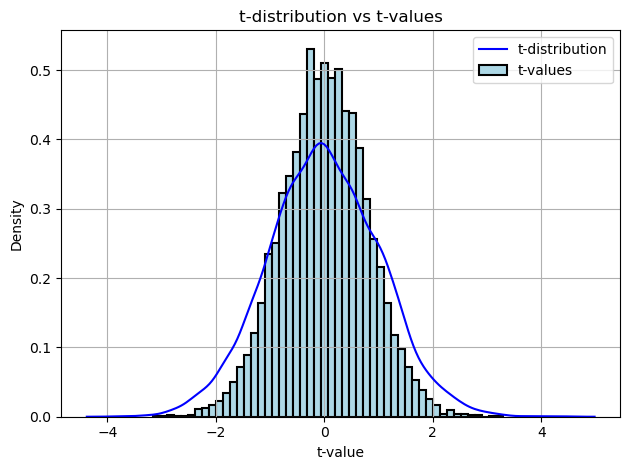

In [94]:
# get t-distribution for 44 degrees of freedom and 100000 samples
x = t.rvs(df=44, size=10000)

# create histogram and pdf
hist = plt.hist(t_list, density=True, bins=50, color='lightblue', edgecolor='black', linewidth=1.5)
pdf = sns.kdeplot(x, color='blue')
plt.grid(visible=True)

# customize plot
plt.title('t-distribution vs t-values')
plt.xlabel('t-value')
plt.tight_layout()
plt.legend(labels=['t-distribution', 't-values'])
plt.show()